<a href="https://colab.research.google.com/github/Knaut-007/GeneticAlgorithm-VRP/blob/main/src/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Install necessary packages
!pip install matplotlib deap numpy


In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


In [12]:
# How many places to visit (not counting the depot)
num_locations = 10

# How many vehicles will do the deliveries
num_vehicles = 3

# Random locations on a 100x100 grid
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]

# Depot at the center
depot = (50, 50)

# Show depot and all locations
print("Depot:", depot)
print("Locations:", locations)


Depot: (50, 50)
Locations: [(54, 43), (90, 82), (34, 96), (2, 76), (54, 26), (84, 39), (61, 9), (8, 14), (4, 77), (81, 18)]


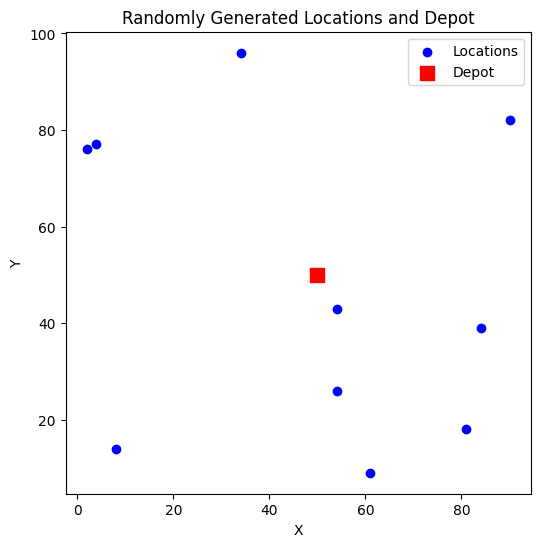

In [13]:
plt.figure(figsize=(6, 6))
x, y = zip(*locations)
plt.scatter(x, y, c='blue', label='Locations')
plt.scatter(*depot, c='red', marker='s', s=100, label='Depot')
plt.title('Randomly Generated Locations and Depot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [14]:
# The fitness function will try to keep total distance low and routes balanced
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Lower is better for both goals
creator.create("Individual", list, fitness=creator.FitnessMin)    # Each solution is just a list of locations

toolbox = base.Toolbox()

# Each individual is a random order of all the locations
toolbox.register("indices", random.sample, range(num_locations), num_locations)

# This sets up how to make a single solution and a whole group (population) of solutions
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# This function checks how good a solution is
def evalVRP(individual):
    total_distance = 0
    distances = []
    for i in range(num_vehicles):
        # Each vehicle gets its own route, starting and ending at the depot
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Add up the distance for this route
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    # If all vehicles travel similar distances, that's better (lower std deviation)
    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

# Register the functions that handle evaluation and making new solutions
toolbox.register("evaluate", evalVRP)
toolbox.register("mate", tools.cxPartialyMatched)  # Mixes routes from two solutions
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Small random swaps in a route
toolbox.register("select", tools.selTournament, tournsize=3)  # Picks the best from random groups

print("Genetic algorithm structure set up successfully.")


Genetic algorithm structure set up successfully.


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


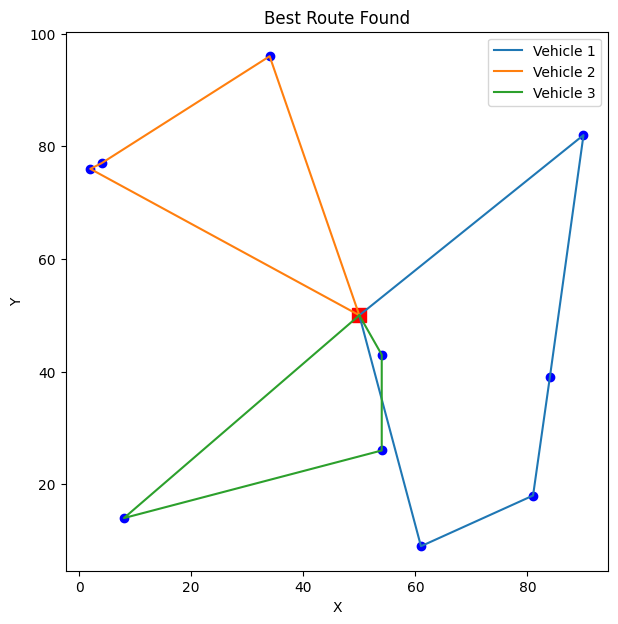

In [19]:
# Routes that each vehicle will take
def plot_routes(individual, title="Routes"):
    plt.figure(figsize=(7, 7))
    # Blue dots are the delivery locations
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    # The depot is marked as a big red square
    plt.plot(depot[0], depot[1], 'rs', markersize=10)
    # Each vehicle gets its own route, shown in a different color
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', label=f"Vehicle {i+1}")
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# The genetic algorithm and shows the best solution found
def main():
    random.seed(42)  # Makes results repeatable
    pop = toolbox.population(n=300)  # The starting group of possible solutions
    hof = tools.HallOfFame(1)        # Keeps track of the best solution so far

    # # Tracks how the solutions get better over time
    # stats = tools.Statistics(lambda ind: ind.fitness.values)
    # stats.register("avg", np.mean)
    # stats.register("min", np.min)

    # The main loop where solutions are selected, mixed, and mutated for many generations
    # algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, halloffame=hof, verbose=False)


    # Shows what the best set of routes looks like
    plot_routes(hof[0], "Best Route Found")
    # return pop, stats, hof

main()


In [22]:
!python3 test_vrp.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


In [23]:
!git clone https://github.com/Knaut-007/GeneticAlgorithm-VRP.git
%cd GeneticAlgorithm-VRP


Cloning into 'GeneticAlgorithm-VRP'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 71 (delta 24), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (71/71), 124.90 KiB | 1.54 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/GeneticAlgorithm-VRP


In [24]:
!python3 tests/test_vrp.py


..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK
